In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd D:\\acads\\Term project 2020

D:\acads\Term project 2020


In [3]:
dataset=pd.read_excel('Dataset_Question2.xlsx')
data=dataset.copy()

In [4]:
data.head()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Test
0,406.86,17.66,121.83,2109.20,0.1033,Pass
1,693.39,24.66,133.18,3138.96,0.3785,Pass
2,523.10,23.23,146.55,1058.24,0.4799,Fail
3,612.86,40.97,94.44,1325.12,0.3147,Fail
4,500.28,37.44,185.48,2474.51,0.2284,Pass


In [5]:
data.shape

(1000, 6)

In [6]:
data.describe()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,546.76643,25.493270,125.029060,2295.797770,0.302692
std,86.85878,14.252407,43.508159,763.680625,0.116062
min,400.31000,1.060000,50.030000,1002.530000,0.100300
25%,469.73500,12.725000,88.587500,1635.682500,0.199075
50%,545.80000,25.375000,124.590000,2268.710000,0.308850
75%,618.87750,37.820000,162.562500,2983.692500,0.401625
max,699.87000,49.890000,199.960000,3595.620000,0.499600


In [7]:
data['Test'].describe()

count     1000
unique       2
top       Pass
freq       585
Name: Test, dtype: object

In [8]:
row, cols = data.shape
for i in range(row):
    if data.iloc[i,cols-1]=='Pass':
        data.iloc[i,cols-1] = 1
    else:
        data.iloc[i,cols-1] = 0
data.head()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Test
0,406.86,17.66,121.83,2109.20,0.1033,1
1,693.39,24.66,133.18,3138.96,0.3785,1
2,523.10,23.23,146.55,1058.24,0.4799,0
3,612.86,40.97,94.44,1325.12,0.3147,0
4,500.28,37.44,185.48,2474.51,0.2284,1


Convert the Test details into 1/0

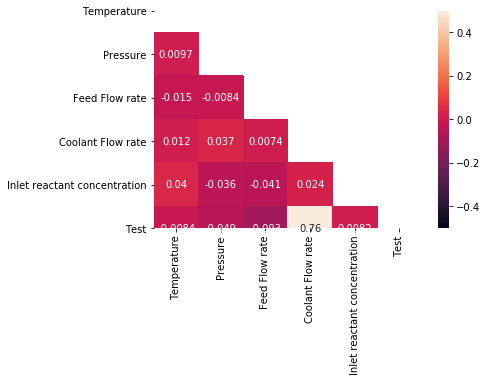

In [9]:
corr_mat=data.corr()
mask = np.zeros(corr_mat.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
corr_heatmap=sns.heatmap(corr_mat,annot=True,vmax=0.5,vmin=-0.5,mask=mask)

In [10]:
corr_mat.style.background_gradient(cmap='coolwarm').set_precision(2)

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Test
Temperature,1,0.0097,-0.015,0.012,0.04,-0.0084
Pressure,0.0097,1,-0.0084,0.037,-0.036,-0.049
Feed Flow rate,-0.015,-0.0084,1,0.0074,-0.041,-0.093
Coolant Flow rate,0.012,0.037,0.0074,1,0.024,0.76
Inlet reactant concentration,0.04,-0.036,-0.041,0.024,1,0.0082
Test,-0.0084,-0.049,-0.093,0.76,0.0082,1


In [11]:
def confusion_matrix(y_true,y_pred):
    tot=y_true.shape[0]
    cfm={}
    tp,tn,fp,fn=0,0,0,0
    for i in range(tot):
        if y_true[i] == y_pred[i]:
            if y_true[i]==1:
                tp+=1
            else:
                tn+=1
        else:
            if y_pred[i]==1:
                fp+=1
            else:
                fn+=1
    
    cfm['tp']=tp
    cfm['tn']=tn
    cfm['fp']=fp
    cfm['fn']=fn
    return  cfm

Define a function to calculate confusion matrix from true and predicted values

In [12]:
#normalising the data
for column in data.columns:
    if column == 'Test':
        break
    mean = data[column].mean()
    variance = data[column].var()
    data[column] = (data[column]-mean)/np.sqrt(variance)

In [13]:
data.describe()


,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Test
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,1.094680e-15,2.059908e-15,5.720202e-15,3.753664e-15,-1.909806e-15,0.585000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.492969
min,-1.686144e+00,-1.714326e+00,-1.723793e+00,-1.693467e+00,-1.743823e+00,0.000000
25%,-8.868583e-01,-8.958676e-01,-8.375799e-01,-8.643866e-01,-8.927711e-01,0.000000
50%,-1.112645e-02,-8.298247e-03,-1.009144e-02,-3.547002e-02,5.305774e-02,1.000000
75%,8.302105e-01,8.648876e-01,8.626759e-01,9.007623e-01,8.524134e-01,1.000000
max,1.762672e+00,1.711762e+00,1.722227e+00,1.702050e+00,1.696573e+00,1.000000


In [14]:
train_data = data.sample(700)
#print(train_data.describe())
print("Train data size = {} ".format(train_data.shape[0]))
x_train = train_data.drop(columns=['Test'],inplace=False)
y_train = train_data['Test']

test_data = data.drop(train_data.index)
x_test = test_data.drop(columns=['Test'],inplace=False)
y_test = test_data['Test']
print("Test data size = {} ".format(test_data.shape[0]))

#Choose 700 rows randomly as training data and rest as test data

Train data size = 700 
Test data size = 300 


In [15]:
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()
print(x_train.shape)
print(x_test.shape)

(700, 5)
(300, 5)


In [16]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
print(y_train.shape)
print(y_test.shape)

(700,)
(300,)


In [17]:
class LogisticRegression_inits:
    def __init__(self,init_method='rand', lr=0.01, num_iter=100000, fit_intercept=False,reg_lambda=0.1):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.init_method=init_method
        self.reg_lambda=reg_lambda;
        self.m=5
        #self.verbose=verbose
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    #Loss: Binary cross entropy
    def __loss(self, h, y):
        non_reg = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
        t=np.square(self.theta)
        reg=(self.reg_lambda/(2*self.m))*np.sum(t)
        return non_reg+reg
    
    def fit(self, X, y):
        m = y.size
        if self.fit_intercept:
            X = self.__add_intercept(X)
        # weights initialization
        if self.init_method=='zeroes':
            self.theta = np.float32([0]*X.shape[1])
        elif self.init_method=='ones':
            self.theta = np.float32([1]*X.shape[1])
        elif self.init_method=='rand':
            self.theta = np.random.normal(0,1,size=X.shape[1])
        
        
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            
            if (i+1)%(self.num_iter/10)==0:
                print("Iteration: {} \t Logloss: {:.5f}".format(i+1, np.mean(self.__loss(h,y))))
            gradient = np.dot(X.T, (h - y))
            self.theta -= self.lr * gradient/self.m
            for j in range(self.theta.size):
                if(j==0):
                    break
                self.theta[j]-=(self.theta[j]*self.reg_lambda*self.lr)/self.m
            
            
    def weights(self):
        print(self.theta.values())
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5):
        pred=self.predict_prob(X) #>= threshold
        for i in range(pred.shape[0]):
            if pred[i]>=threshold:
                pred[i]=1
            else:
                pred[i]=0
        
        return pred

In [18]:
model_rand=LogisticRegression_inits('rand',lr = 0.1, num_iter=2000,reg_lambda=0)
model_rand.fit(x_train,y_train)
y_pred=model_rand.predict(x_test,threshold = 0.4)
cm=confusion_matrix(y_test,y_pred)
acc=(cm['tp']+cm['tn'])/sum(cm.values())
pre=(cm['tp'])/(cm['tp']+cm['fp'])
rec=(cm['tp'])/(cm['tp']+cm['fn'])
fsc= (2*pre*rec)/(pre+rec)
print('accuracy: ' ,acc)
print('precision: ',pre)
print('recall: ',rec)
print('f_score: ',fsc)
print("Confusion Matrix")
print(cm)

Iteration: 200 	 Logloss: 0.33199
Iteration: 400 	 Logloss: 0.33199
Iteration: 600 	 Logloss: 0.33199
Iteration: 800 	 Logloss: 0.33199
Iteration: 1000 	 Logloss: 0.33199
Iteration: 1200 	 Logloss: 0.33199
Iteration: 1400 	 Logloss: 0.33199
Iteration: 1600 	 Logloss: 0.33199
Iteration: 1800 	 Logloss: 0.33199
Iteration: 2000 	 Logloss: 0.33199
accuracy:  0.9166666666666666
precision:  0.9612903225806452
recall:  0.8869047619047619
f_score:  0.9226006191950464
Confusion Matrix
{'tp': 149, 'tn': 126, 'fp': 6, 'fn': 19}


In [19]:
model0=LogisticRegression_inits('zeroes',num_iter=10000,lr=0.001,reg_lambda=1)
model0.fit(x_train,y_train)
y_pred=model0.predict(x_test,threshold=0.4)
cm=confusion_matrix(y_test,y_pred)
acc=(cm['tp']+cm['tn'])/sum(cm.values())
pre=(cm['tp'])/(cm['tp']+cm['fp'])
rec=(cm['tp'])/(cm['tp']+cm['fn'])
fsc= 2*pre*rec/(pre+rec)
print('accuracy: ' ,acc)
print('precision: ',pre)
print('recall: ',rec)
print('f_score: ',fsc)
print("Confusion Matrix")
print(cm)

Iteration: 1000 	 Logloss: 1.13626
Iteration: 2000 	 Logloss: 1.14150
Iteration: 3000 	 Logloss: 1.14154
Iteration: 4000 	 Logloss: 1.14154
Iteration: 5000 	 Logloss: 1.14154
Iteration: 6000 	 Logloss: 1.14154
Iteration: 7000 	 Logloss: 1.14154
Iteration: 8000 	 Logloss: 1.14154
Iteration: 9000 	 Logloss: 1.14154
Iteration: 10000 	 Logloss: 1.14154
accuracy:  0.9166666666666666
precision:  0.9612903225806452
recall:  0.8869047619047619
f_score:  0.9226006191950464
Confusion Matrix
{'tp': 149, 'tn': 126, 'fp': 6, 'fn': 19}


In [20]:
model1=LogisticRegression_inits('ones',num_iter=10000,lr=0.01,reg_lambda=10)
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test,threshold=0.4)
cm=confusion_matrix(y_test,y_pred)
acc=(cm['tp']+cm['tn'])/sum(cm.values())
pre=(cm['tp'])/(cm['tp']+cm['fp'])
rec=(cm['tp'])/(cm['tp']+cm['fn'])
fsc= 2*pre*rec/(pre+rec)
print('accuracy: ' ,acc)
print('precision: ',pre)
print('recall: ',rec)
print('f_score: ',fsc)
print("Confusion Matrix")
print(cm)

Iteration: 1000 	 Logloss: 8.42755
Iteration: 2000 	 Logloss: 8.42755
Iteration: 3000 	 Logloss: 8.42755
Iteration: 4000 	 Logloss: 8.42755
Iteration: 5000 	 Logloss: 8.42755
Iteration: 6000 	 Logloss: 8.42755
Iteration: 7000 	 Logloss: 8.42755
Iteration: 8000 	 Logloss: 8.42755
Iteration: 9000 	 Logloss: 8.42755
Iteration: 10000 	 Logloss: 8.42755
accuracy:  0.9166666666666666
precision:  0.9612903225806452
recall:  0.8869047619047619
f_score:  0.9226006191950464
Confusion Matrix
{'tp': 149, 'tn': 126, 'fp': 6, 'fn': 19}


In [21]:
y_pred=model0.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
acc=(cm['tp']+cm['tn'])/sum(cm.values())
pre=(cm['tp'])/(cm['tp']+cm['fp'])
rec=(cm['tp'])/(cm['tp']+cm['fn'])
fsc= 2*pre*rec/(pre+rec)
print('accuracy: ' ,acc)
print('precision: ',pre)
print('recall: ',rec)
print('f_score: ',fsc)
print("Confusion Matrix")
print(cm)

accuracy:  0.89
precision:  0.972027972027972
recall:  0.8273809523809523
f_score:  0.8938906752411575
Confusion Matrix
{'tp': 139, 'tn': 128, 'fp': 4, 'fn': 29}


<h3>Comparison with scikitlearn's logistic regression</h3>

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)


C:\Users\naren\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred=lr.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
acc=(cm['tp']+cm['tn'])/sum(cm.values())
pre=(cm['tp'])/(cm['tp']+cm['fp'])
rec=(cm['tp'])/(cm['tp']+cm['fn'])
fsc= 2*pre*rec/(pre+rec)
print('accuracy: ' ,acc)
print('precision: ',pre)
print('recall: ',rec)
print('f_score: ',fsc)
print("Confusion Matrix")
print(cm)

accuracy:  0.9533333333333334
precision:  0.9583333333333334
recall:  0.9583333333333334
f_score:  0.9583333333333334
Confusion Matrix
{'tp': 161, 'tn': 125, 'fp': 7, 'fn': 7}


In [24]:
num_ones = 0
for i in range(y_pred.size):
    if y_pred[i] == 1:
        num_ones += 1
print(num_ones," ",y_pred.size)

168   300
